In [1]:
import pandas as pd

In [162]:
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)

In [163]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [164]:
data.shape

(200, 4)

In [16]:
import seaborn as sns
%matplotlib inline

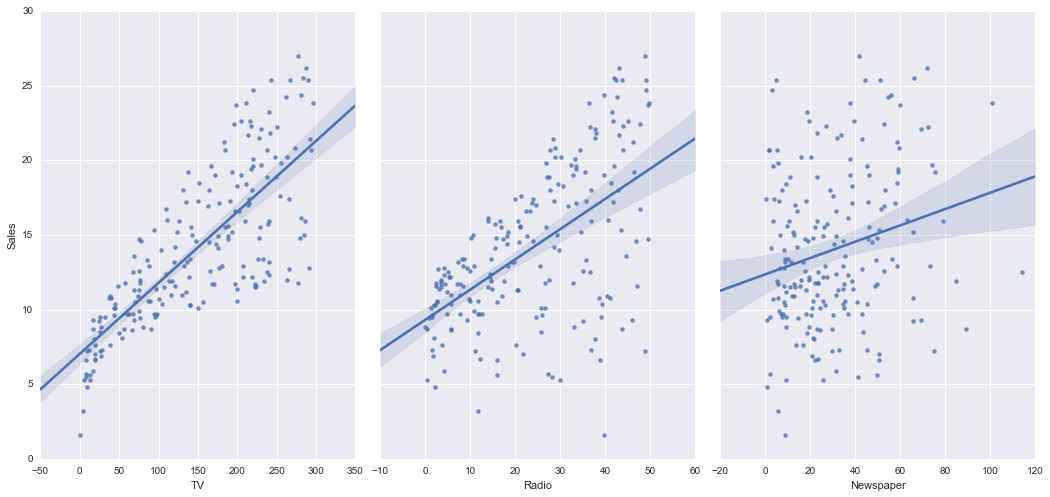

In [29]:
sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales',size=7,aspect=0.7,kind='reg')

In [165]:
X=data[['TV','Radio','Newspaper']]
Y=data['Sales']
type(X)

pandas.core.frame.DataFrame

In [66]:
from sklearn.cross_validation import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25)

In [45]:
print xtrain.shape,xtest.shape,ytrain.shape

(120, 3) (80, 3) (120L,)


In [67]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
print linreg.intercept_
print linreg.coef_

2.77251625693
[ 0.04678252  0.19123746 -0.00293264]


In [69]:
import numpy as np
from sklearn import metrics
print metrics.mean_absolute_error(ytest,linreg.predict(xtest))
print metrics.mean_squared_error(ytest,linreg.predict(xtest))
print np.sqrt(metrics.mean_squared_error(ytest,linreg.predict(xtest)))

1.15849099102
2.26787002923
1.50594489582


In [166]:
X=data[['TV','Radio']]
from sklearn.cross_validation import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=1)
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
print np.sqrt(metrics.mean_squared_error(ytest,linreg.predict(xtest)))

1.38790346994


In [167]:
from sklearn.cross_validation import KFold
kf=KFold(200,n_folds=10,shuffle=True)

In [182]:
for it,cos in enumerate(kf,start=1):
    linreg=LinearRegression()
    linreg.fit(X.values[cos[0]],Y.values[cos[0]])
    print '№ of fold=',it, '   RMSE=', np.sqrt(metrics.mean_squared_error(Y.values[cos[1]],linreg.predict(X.values[cos[1]])))

№ of fold= 1    RMSE= 1.49241434697
№ of fold= 2    RMSE= 1.89048886025
№ of fold= 3    RMSE= 1.72088568633
№ of fold= 4    RMSE= 2.44354714031
№ of fold= 5    RMSE= 0.94055685779
№ of fold= 6    RMSE= 1.44355348189
№ of fold= 7    RMSE= 1.7722039419
№ of fold= 8    RMSE= 1.50028497324
№ of fold= 9    RMSE= 1.87613808239
№ of fold= 10    RMSE= 1.58583792766


In [169]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [179]:
linreg=LinearRegression()
score=cross_val_score(linreg,X,Y,cv=10)

In [181]:
score.mean()

0.88696705168101286

In [188]:
cval=10**np.array([-4.,-3,-2,-1,0,1,2,3,4])
score=[]
for c in cval:
    linreg=LinearRegression(C=c)
    score.append(cross_val_score(linreg,X,Y,cv=10).mean())

TypeError: __init__() got an unexpected keyword argument 'C'